In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
# Loading the dataset of Car
df = pd.read_csv("S:\Machine-Learning_Tutorials\Projects_ML\Data\scrap price.csv")
print(df.head())
print(df.info())

   ID  symboling                      name fueltypes aspiration doornumbers  \
0   1          3        alfa-romero giulia       gas        std         two   
1   2          3       alfa-romero stelvio       gas        std         two   
2   3          1  alfa-romero Quadrifoglio       gas        std         two   
3   4          2               audi 100 ls       gas        std        four   
4   5          2                audi 100ls       gas        std        four   

       carbody drivewheels enginelocation  wheelbase  ...  enginesize  \
0  convertible         rwd          front       88.6  ...         130   
1  convertible         rwd          front       88.6  ...         130   
2    hatchback         rwd          front       94.5  ...         152   
3        sedan         fwd          front       99.8  ...         109   
4        sedan         4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0    

<a name="->"></a>
## About the Dataset:

This is the dataset of different Cars and its Pricing. This internaly uses the features like `car_name, fueltypes, horsepower, citympg, `
`enginelocation, and many more`.

The idea behind this dataset is as following :
The car company wants to enter a new market and needs an estimation of exactly which variables affect the car prices.
The goal is

- Which variables are significant in predicting the price of a car
- How well do those variables describe the price of a car

<a name="1"></a>
## 1 - Basic EDA on Dataset.

Now, Lets extract the features we want to perform Simple Linear Regration on.

>1. Firstly, we will use following features from the dataset in order to predict the price of the a particular car
>    - `Horsepower` as the input feature named `X`
>    - `Price` as the predction variable called `y`

in code, we call the training variables with `x_train` and `y_train`.
    

In [7]:
# modifying dataset for Simple Linear Regrassion 

x_train = df['horsepower']
y_train = df['price']

# Before starting on any task, it is useful to get more familiar with your dataset.
# print(x_train)

print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train.head(), "\n \n") 

# print(y_train)
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of x_train: <class 'pandas.core.series.Series'>
First five elements of x_train are:
 0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64 
 

Type of y_train: <class 'pandas.core.series.Series'>
First five elements of y_train are:
 0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64


It is seen that the type of the data is in **`Pandas Series`** formate which is not sutable for numpy operation.

So, we have to convert it to **`numpy array`** formate. 

In [8]:
# converting Series to Array
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

print(type(x_train), '\n', type(y_train))

<class 'numpy.ndarray'> 
 <class 'numpy.ndarray'>


In [9]:
# checking the dimention of the data

print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("No of examples : ", len(x_train))

Shape of x_train :  (205,)
Shape of y_train :  (205,)
No of examples :  205


Furthermore, In order to understand the data more clearly we can plot the data in 2D Scatter plot.

- Let's plot Hoursepower vs. Price graph

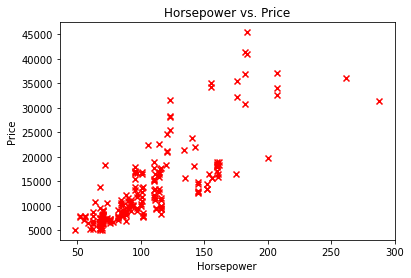

In [10]:
# ploting the data
plt.scatter(x_train, y_train, marker = 'x', c = 'r')

# Set the title
plt.title("Horsepower vs. Price")
# Set the y-axis label
plt.ylabel('Price')
# Set the x-axis label
plt.xlabel('Horsepower')
plt.show()

## 2 - Understanding Math behind Linear Regrassion

We have to understand basic of maths in oredr to better understand linear regrassion more clearly 

>In the socound stage, we would like to build Model for Simple Linear Regrassion.
>
>    - for this to be succesful, first you need to understand the maths behind the code of LR.
>    - The maths is explained in following cell

**This is the maths behind LR :**
> - you will fit the linear regression parameters $(w,b)$ to your dataset.
>   To train a linear regression model, you want to find the best $(w, b)$ parameters that fit your dataset.
>   because the function of the model is as following :
>       $$f_{w,b}(x) = wx + b$$
> - To compare how one choice of $(w, b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w, b)$.
> - So, the choice of $(w,b)$ that fits the data is the one that has smallest cost $J(w,b)$

- To minimiz the cost function we can you concept like **Gradient Descent**.
- With each step of gradient descent, your parameters $(w, b)$ come closer to the optimal values that will achieve the lowest cost $J(w, b)$.
- The trained linear regression model can then take the input feature **X (Horsepower)** and output a prediction (predicted price of the Car).

**Computing the Cost between Predcted and Actual Price :**

Gradient descent involves repeated steps to adjust the value of your parameter $(w, b)$ to gradually get a smaller and smaller cost $J(w, b)$.
At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w, b)$ as $(w, b)$ gets updated.

#### Function of Cost =
for one variable, the cost function for linear regression J(w, b) is defined as
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 
here, function $f_{w,b}(x^{(i)})$ is the result of predcted value.

$m$ is the No. of training examples



**Now, Let's make a function that compute the Cost between Actual and Predicted value of the Price.**

In [11]:
# First, We have to derive the cost for Prediction.
def Cost_compute(x, y, w, b):

    m = x.shape[0]
    h = 0

# implementing math function using for loop...
    for i in range(m):
        
        f_wb = w*x[i] + b                   # The prediction of the model for that example
        cost_exp = (f_wb - y[i])**2         # The cost for that example
        h += cost_exp                       # Adding All cost of Exaple
        
        total_cost = (1/(2*m))*(h)          # Computing total cost

    return total_cost

## 3 - Gradient Descent Implementation

It is very important part of LR because this algorithm can help the algorith to find the lowest cost, we can get by choosing the value of $(w, b)$.

The gradient descent algorithm is as follows:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) 
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
$$
* m shows the number of training examples in the dataset
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the actual value


Now, Let's implement a function called `compute_gradient_descent` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [12]:
def compute_gradient_descent(x, y, w, b):
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):

        f_wb = (w*x[i]) + b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    
    dj_dw = ( 1 / m ) * dj_dw
    dj_db = ( 1 / m ) * dj_db 
        
    return dj_dw, dj_db

In [14]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient_descent(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -1636388.0376585368 -13276.710570731706


In [15]:
# Compute and display cost and gradient with non-zero w
test_w = 2
test_b = 10
tmp_dj_dw, tmp_dj_db = compute_gradient_descent(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -1610553.9108292684 -13058.476424390243


**UNTIL HERE WEHAVE MADE FUNCTIONS THAT CAN CALCULATE THE COST AND GRADIENT. HOWEVER, WE STILL HAVE TO MANUALLY PUT THE VALUES OF $w$, $b$ IN THE ALOGRITHM.**

## 4 - Complation of The Algorithm

### Our next stape is to automate the values of $w, $b so, the Algorithm can find best line that fit into data.

You will now find the optimal parameters of a linear regression model by using batch gradient descent.

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, J(w, b) should neverincrease and should converge to a steady value by the end of the algorithm.

In [16]:
import copy
import math

def The_gradient_descent(x, y, w_fir, b_fir, Cost_compute, compute_gradient_descent, alpha, epocs):

    # number of training examples
    m = len(x)
    
    # array to store cost of J and w's at each iteration
    J_hist = []
    w_hist = []
    w = w_fir
    b = b_fir

    for i in range(epocs):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient_descent(x, y, w, b )  

        # Use Repeat until converge - Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  Cost_compute(x, y, w, b)
            J_hist.append(cost)

        # Print cost every at intervals
        if i% math.ceil(epocs/10) == 0:     # math.ceil will roud off the floting number
            w_hist.append(w)
            print(f"Iteration {i:4}: Cost {float(J_hist[-1]):8.2f}   ")
        
    return w, b, J_hist, w_hist 


**This was the last stage og bulding the algorithm.**

### Now, let's run the gradient descent algorithm in order to learn the parameters for our dataset.

In [26]:
initial_w = 1
initial_b = 10

iterations = 15000
alpha = 0.98e-7

w,b,_,_ = The_gradient_descent(x_train ,y_train, initial_w, initial_b, Cost_compute, compute_gradient_descent, alpha, iterations)
print("w,b collected by gradient descent:", w, b)

Iteration    0: Cost 117870884.99   
Iteration 1500: Cost 14653509.98   
Iteration 3000: Cost 11962783.23   
Iteration 4500: Cost 11892609.29   
Iteration 6000: Cost 11890748.55   
Iteration 7500: Cost 11890668.61   
Iteration 9000: Cost 11890635.10   
Iteration 10500: Cost 11890602.80   
Iteration 12000: Cost 11890570.54   
Iteration 13500: Cost 11890538.27   
w,b collected by gradient descent: 131.9165115392373 10.410818401420256


To calculate the predictions on the entire dataset, we can loop through all the training
examples and calculate the prediction for each example. This is shown in the code block
below.

In [27]:
n = x_train.shape[0]
prdt = np.zeros(n)

for i in range(n):
    prdt[i] = w * x_train[i] + b

Text(0.5, 0, 'Horsepower')

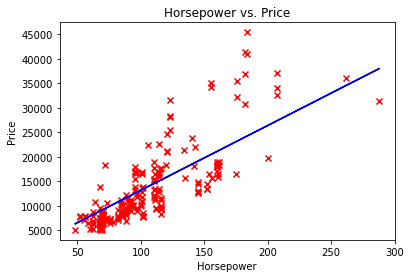

In [28]:
# Ploting the fit on the dataset
plt.plot(x_train, prdt, c = "b")

plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Horsepower vs. Price")
plt.ylabel('Price')
plt.xlabel('Horsepower')

#### Now, Lets test the model on the external Data.


In [29]:
predict1 = 670 * w + b
print('For Horsepower of 670, we predict the price of =', (predict1))

predict2 = 362 * w + b
print('For Horsepower of 362, we predict the price of =', (predict2))

For Horsepower of 670, we predict the price of = 88394.4735496904
For Horsepower of 362, we predict the price of = 47764.187995605316


# -------------- END --------------